# PRIYANSH SANGULE CS16021

# Generated Datasets

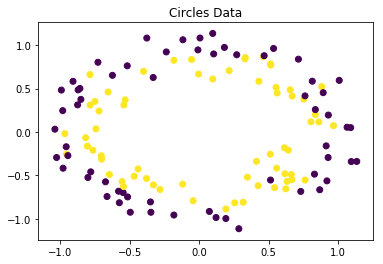

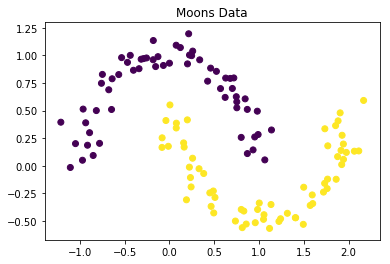

In [30]:
from sklearn.datasets import make_circles , make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

datasets = []

X, y = make_circles(n_samples=500, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
datasets.append([X_train,X_test,y_train,y_test])

plt.title("Circles Data")
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.show()

X, y = make_moons(n_samples=500, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

datasets.append([X_train,X_test,y_train,y_test])
plt.title("Moons Data")
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.show()



# Q1 Voting Classifier

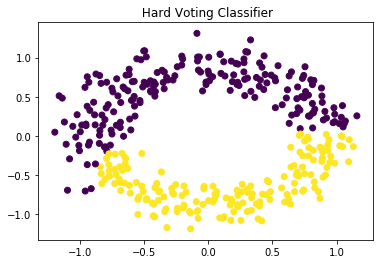

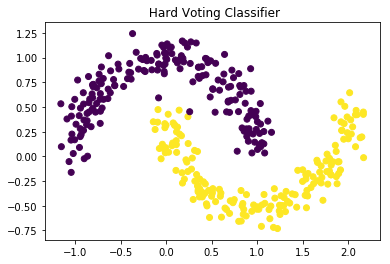

In [32]:
# Common imports
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Ensemble
log_clf = LogisticRegression(solver="liblinear", random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=10)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('svc', svm_clf), ('dt',dt_clf)],voting='hard')
for X_test , _ , _ , _ in (dataset for dataset in datasets):
    voting_clf.fit(X_train, y_train)
    y_pred = voting_clf.predict(X_test)
    plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)
    plt.title(" Hard Voting Classifier")
    plt.show()


# Q2,3,4,5,6 Classifiers and their plots

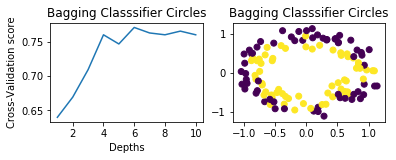

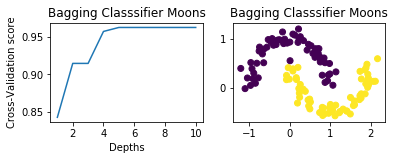

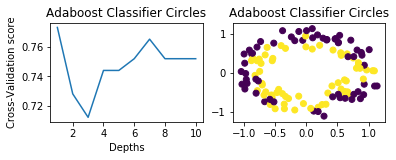

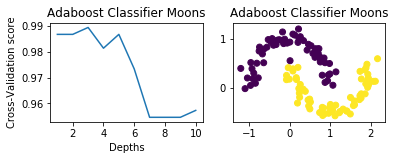

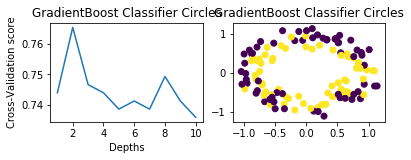

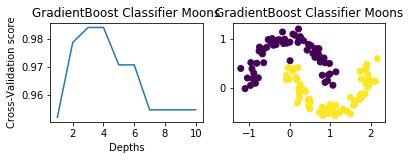

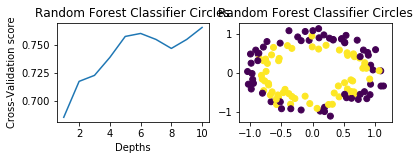

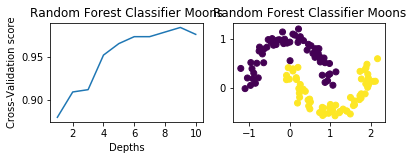

In [37]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
classifier_names=["Bagging Classsifier","Adaboost Classifier","GradientBoost Classifier","Random Forest Classifier"]

#for the 4 classifiers and each under two datasets
#cv_scores[0] for circles
#cv_scores[1] for moons
cv_scores=[[[],[],[],[]],[[],[],[],[]]] 

#iterate over dpeth
for depth in range (1,11):
    
    #define classifiers
    classifiers = [
        BaggingClassifier(DecisionTreeClassifier(max_depth = depth),n_estimators=100),
        AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth),n_estimators=100),
        GradientBoostingClassifier(max_depth=depth,n_estimators=100),
        RandomForestClassifier(max_depth=depth,n_estimators=100)
    ]
    
    #iterate over all classifiers
    for index, clf in enumerate(classifiers):
        
        #loop over datasets
        for dataset_index, data in enumerate(dataset for dataset in datasets):
            X_train , X_test , y_train , y_test = data
            
            if(dataset_index==0):
                dataset_name = "Circles"
            else:
                dataset_name = "Moons"
                
            cv_score=cross_val_score(clf, X_train, y_train, cv=3).mean()
            cv_scores[dataset_index][index].append(cv_score)

            #Draw plots for depth = 10 (at the end of each iteration)
            if(depth==10):
                clf.fit(X_train,y_train)
                y_pred = clf.predict(X_test)
                
                ax2=plt.subplot(221)
                depths = [j for j in range(1,11)]
                ax2.plot(depths,cv_scores[dataset_index][index])
                ax2.set_title(classifier_names[index] + " " +  dataset_name)
                ax2.set_xlabel("Depths")
                ax2.set_ylabel("Cross-Validation score")

                ax=plt.subplot(222)
                ax.scatter(X_test[:,0],X_test[:,1],c=y_pred)
                ax.set_title(classifier_names[index] + " " +dataset_name)
                plt.show()

            
